# imports

In [1]:
import datetime
import importlib
import pandas as pd, numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy_ext import rolling_apply as rolling_apply_ext
import talib
from talib import MA_Type
import numpy.linalg

In [2]:
import algo.data.read

In [3]:
df_binance_20230904_05 =  algo.data.read.df_binance_202309[(algo.data.read.df_binance_202309.index >= "2023-09-04 00:00:00") & (algo.data.read.df_binance_202309.index < "2023-09-06 00:00:00")]

In [4]:
symbols_pool = [s for _, s in sorted([(m, s) for s, m in algo.data.read.df_binance_202309.mean().items() if m > 10 and m < 500], reverse=True)]
# remove duplicates within USDT / BUSD swap
symbols_pool = [s for s in symbols_pool if s not in [s.replace('USDT', 'BUSD') for s in symbols_pool if 'USDT' in s]]
symbols_pool

['BIFIUSDT',
 'BNBUSDT',
 'BCHUSDT',
 'XMRUSDT',
 'GNOUSDT',
 'QNTUSDT',
 'LTCUSDT',
 'AAVEUSDT',
 'KP3RUSDT',
 'ILVUSDT',
 'COMPUSDT',
 'GMXUSDT',
 'TRBUSDT',
 'WNXMUSDT',
 'DASHUSDT',
 'ZECUSDT',
 'EGLDUSDT',
 'RPLUSDT',
 'FARMUSDT',
 'BNBUPUSDT',
 'SOLUSDT',
 'KSMUSDT',
 'SSVUSDT',
 'ETCUSDT',
 'MLNUSDT',
 'NMRUSDT',
 'DCRUSDT',
 'CREAMBUSD',
 'ALCXUSDT']

In [5]:
set_size, set_num = 2, 6
symbols_sets = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_binance_202308, 10, set_size, set_num, symbols_pool, high_corr=True)
symbols_sets

start_symbol: FARMUSDT
(0.9853091961277229, 'FARMUSDT', 'COMPUSDT')
start_symbol: ZECUSDT
(0.9821116700462315, 'ZECUSDT', 'LTCUSDT')
start_symbol: BNBUPUSDT
(0.981275983108528, 'BNBUPUSDT', 'BNBUSDT')
start_symbol: SSVUSDT
(0.9804022282607159, 'SSVUSDT', 'KP3RUSDT')
start_symbol: SOLUSDT
(0.9798867228498191, 'SOLUSDT', 'ILVUSDT')
start_symbol: DASHUSDT
(0.9720447363256844, 'DASHUSDT', 'BIFIUSDT')


[['FARMUSDT', 'COMPUSDT'],
 ['ZECUSDT', 'LTCUSDT'],
 ['BNBUPUSDT', 'BNBUSDT'],
 ['SSVUSDT', 'KP3RUSDT'],
 ['SOLUSDT', 'ILVUSDT'],
 ['DASHUSDT', 'BIFIUSDT']]

In [6]:
set_size, set_num = 2, 6
symbols_sets_low_corr = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_binance_202308, 10, set_size, set_num, symbols_pool, high_corr=False)
symbols_sets_low_corr

start_symbol: EGLDUSDT
(0.005776412349793026, 'EGLDUSDT', 'QNTUSDT')
start_symbol: RPLUSDT
(0.038605806813175034, 'RPLUSDT', 'TRBUSDT')
start_symbol: CREAMBUSD
(0.7847216100092885, 'CREAMBUSD', 'WNXMUSDT')
start_symbol: DCRUSDT
(0.7866866013569517, 'DCRUSDT', 'KSMUSDT')
start_symbol: ETCUSDT
(0.8245124827124991, 'ETCUSDT', 'XMRUSDT')
start_symbol: BCHUSDT
(0.8533584437153164, 'BCHUSDT', 'BIFIUSDT')


[['EGLDUSDT', 'QNTUSDT'],
 ['RPLUSDT', 'TRBUSDT'],
 ['CREAMBUSD', 'WNXMUSDT'],
 ['DCRUSDT', 'KSMUSDT'],
 ['ETCUSDT', 'XMRUSDT'],
 ['BCHUSDT', 'BIFIUSDT']]

In [864]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols, date_str_20230806, date_str_20230809).corr().style.background_gradient(cmap='coolwarm')

symbol,BNBUPUSDT,BNBUSDT,SOLUSDT
symbol,,,
BNBUPUSDT,1.000000,0.896701,0.655109
BNBUSDT,0.896701,1.000000,0.721838
SOLUSDT,0.655109,0.721838,1.000000


In [865]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[0], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,EGLDUSDT,QNTUSDT
symbol,,
EGLDUSDT,1.000000,0.007205
QNTUSDT,0.007205,1.000000


In [866]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[1], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,TRBUSDT,RPLUSDT
symbol,,
TRBUSDT,1.000000,-0.024562
RPLUSDT,-0.024562,1.000000


# Solve the minimal predictability condition

In [8]:
import algo.mean_reversion.predictability
importlib.reload(algo.mean_reversion.predictability)

<module 'algo.mean_reversion.predictability' from '/home/junlim/projects/mean_reversal/algo/mean_reversion/predictability.py'>

# Trading calculations

In [9]:
import algo.statarbitrage.bband
importlib.reload(algo.statarbitrage.bband)

<module 'algo.statarbitrage.bband' from '/home/junlim/projects/mean_reversal/algo/statarbitrage/bband.py'>

# Static Portfolio construction

In [10]:
import algo.trading.trade
importlib.reload(algo.trading.trade)

<module 'algo.trading.trade' from '/home/junlim/projects/mean_reversal/algo/trading/trade.py'>

In [11]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 2.0)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)

In [12]:
df_binance_20230904_05 =  algo.data.read.df_binance_202309[(algo.data.read.df_binance_202309.index >= "2023-09-04 00:00:00") & (algo.data.read.df_binance_202309.index < "2023-09-06 00:00:00")]
df_binance_20230904_07 =  algo.data.read.df_binance_202309[(algo.data.read.df_binance_202309.index >= "2023-09-04 00:00:00") & (algo.data.read.df_binance_202309.index < "2023-09-08 00:00:00")]
df_binance_20230908_11 =  algo.data.read.df_binance_202309[(algo.data.read.df_binance_202309.index >= "2023-09-08 00:00:00") & (algo.data.read.df_binance_202309.index < "2023-09-12 00:00:00")]
df_binance_20230904_11 =  algo.data.read.df_binance_202309[(algo.data.read.df_binance_202309.index >= "2023-09-04 00:00:00") & (algo.data.read.df_binance_202309.index < "2023-09-12 00:00:00")]

In [14]:
df_prices = df_binance_20230904_07[symbols_sets[0]]
df_prices_train = df_prices.resample(f'{stat_arbitrage_trading_param.train_data_sample_period_minutes}min').last()
df_prices_bband = df_prices.resample(f'{stat_arbitrage_trading_param.bband_sample_period_minutes}min').last()
df_prices_trading = df_prices.resample(f'{stat_arbitrage_trading_param.trading_sample_period_minutes}min').last()
var_eigen_vals, var_eigen_vecs = algo.mean_reversion.predictability.get_wgts_predictability_transpose(*df_prices_train.values.T)

In [15]:
df_prices.tail(3)

symbol,FARMUSDT,COMPUSDT
time,,
2023-09-07 23:57:00,22.81,40.16
2023-09-07 23:58:00,22.82,40.16
2023-09-07 23:59:00,22.82,40.15


In [16]:
var_eigen_vals

array([0.84450998, 0.96562954])

In [17]:
print(var_eigen_vecs[:,0])

[0.50187211 0.86494184]


In [18]:
df_prices.iloc[-1] * var_eigen_vecs[:,0]

symbol
FARMUSDT    11.452722
COMPUSDT    34.727415
Name: 2023-09-07 23:59:00, dtype: float64

In [19]:
print(var_eigen_vecs[:,-1])

[ 0.86494184 -0.50187211]


<Axes: xlabel='time'>

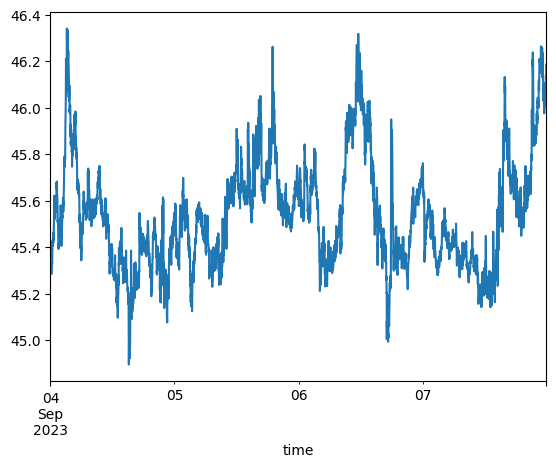

In [20]:
(df_prices * var_eigen_vecs[:,0]).sum(axis=1).plot()

<Axes: xlabel='time'>

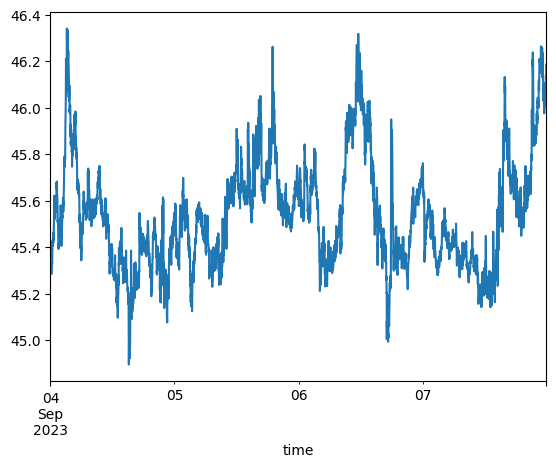

In [21]:
(df_prices * var_eigen_vecs[:,0]).sum(axis=1).plot()

## Bollinger bands trading

In [22]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 1.6)
stat_arbitrage_trading_param = algo.trading.trade.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, 
    bband_sample_period_minutes=10, trading_sample_period_minutes=1, if_evecs=True, bband_trading_param=bband_trading_param)

In [25]:
values = algo.statarbitrage.bband.add_features(df_prices_bband, df_prices_trading, var_eigen_vecs[:,0], stat_arbitrage_trading_param.bband_trading_param, rebalance_buffer=stat_arbitrage_trading_param.bband_trading_param.bb_windows)

<Axes: xlabel='time'>

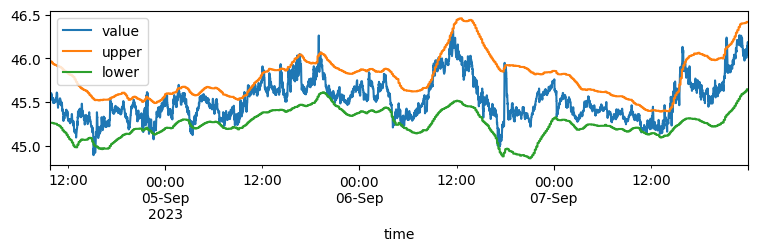

In [26]:
values[['value', 'upper', 'lower']].plot(figsize=(9, 2))

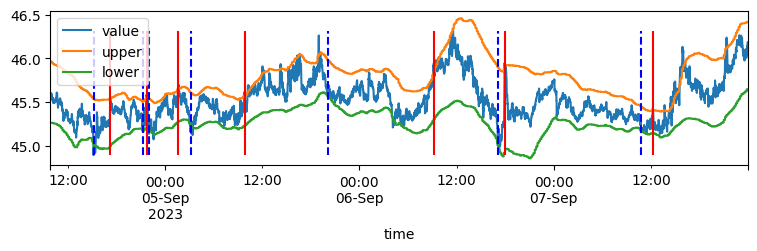

In [27]:
ax = values[['value', 'upper', 'lower']].dropna().plot(figsize=(9, 2))
ymin, ymax = values.value.min(), values.value.max()

# add vertical lines
ax.vlines(x=list(values[values.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values[values.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

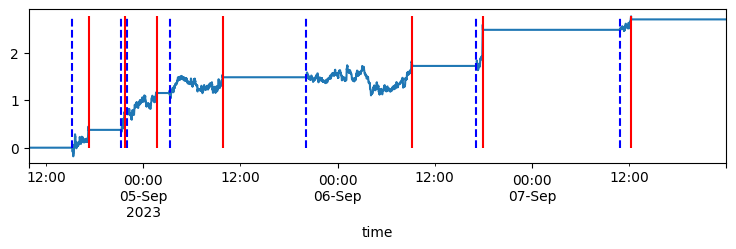

In [28]:
ax = values.profit_raw.cumsum().iloc[:,].plot(figsize=(9, 2))
ymin, ymax = 0, values.profit_raw.cumsum().max()

# add vertical lines
ax.vlines(x=list(values[values.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values[values.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

In [29]:
values[(values.index >= "2023-09-11 03:58:00") & (values.index <= "2023-09-11 04:05:00")]

,value,rebalanced,rebalance_age,upper,lower,value_prev,lower_crossed_upward,lower_crossed_downward,upper_crossed_upward,upper_crossed_downward,in_position,position_changed,mean_size,position_size,profit_raw,profit
time,,,,,,,,,,,,,,,,


<Axes: xlabel='time'>

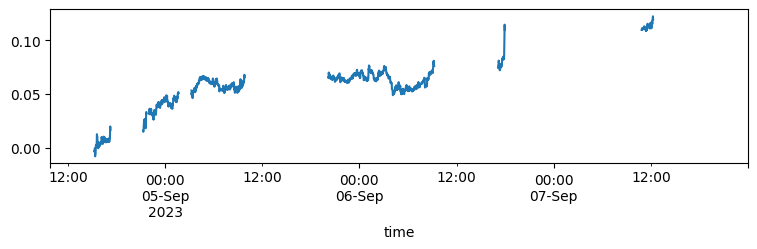

In [30]:
(values.profit_raw / values.position_size).cumsum().plot(figsize=(9, 2))